<a href="https://colab.research.google.com/github/blakesodikoff/1221DarkMatter/blob/main/Orbital_velocity_of_Andromeda(currently%20at%20Bulge%20step).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import numpy as np # importing this for operations such as sqrt
import astropy.units as u # this is for unit conversions
import astropy.constants as ac # to include astronomical constants such as G
import matplotlib.pyplot as plt # for plotting graphs

In [3]:
from google.colab import files # to upload data files

In [4]:
upload = files.upload () # upload the galaxy rotation data file

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [5]:
import astropy.io.ascii # this allows reading of data files

In [6]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")
# this allows us to store the data in a table named 'tab'

(0.0, 300.0)

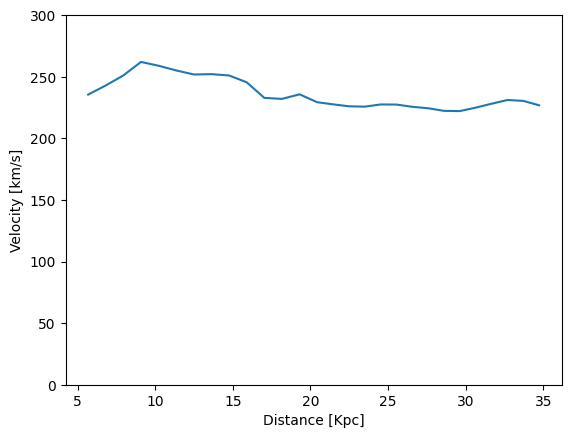

In [7]:
dis = tab["col2"] # distance data will be stored in 'dis'.
vel = tab["col3"] # velocity data stored in 'vel'.
plt.plot(dis, vel) # plotting distance with respect to velocity
plt.xlabel("Distance [Kpc]") # label for the x axis
plt.ylabel("Velocity [km/s]") # label for the y axis
plt.ylim(0,300) # setting y-axis limits

In [8]:
print(dis) # print the distance data

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [10]:
def calculate_orbital_velocity(mass, radius):
 # defining a function to calculate the orbital velocity
  return(np.sqrt(ac.G * mass / radius))
 # use the formula sqrt( G * mass/radius)

In [11]:
mass = 1 * u.earthMass # Earth's mass
radius = 1 * u.earthRad # Earth's radius
orb_vel = calculate_orbital_velocity(mass, radius) # calculate orbital velocity
print(orb_vel.to(u.km / u.s)) # convert the result to km/s and print

7.905388234385281 km / s


In [12]:
# calculation for a black hole with a certain mass and radius
mass = 3e7 * u.solMass # mass of the black hole in Solar masses
radius = 5.68 * 1000 * u.parsec # radius in parsecs
orb_vel = calculate_orbital_velocity(mass, radius) # calculating orbital velocity
print(orb_vel.to(u.km / u.s)) # convert result to km/s and print

4.766142291386287 km / s


In [13]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis):
  # enumerating dis to get index and value
  rad = radius * 1000 * u.parsec # converting kpc to parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  # calcuating orbital velocity for this radius
  vel_bh[i] = orb_vel # store the calculated velocity
  # print("The orbital velocity at", radius, "kpc =", orb_vel.to(u.km / u.s))

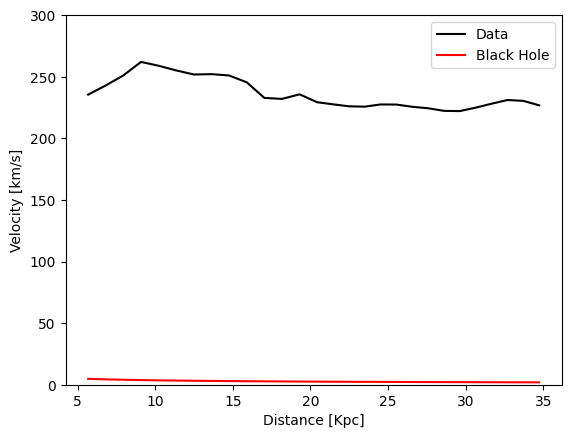

In [14]:
# plotting the final graph to include actual data and black hole data
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data") # plotting actual data
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
# plotting black hole data
plt.xlabel("Distance [Kpc]") # label for the x axis
plt.ylabel("Velocity [km/s]") # label for the y axis
plt.ylim(0,300) # set the y axis limits
plt.legend() # add a legend to the plot

In [32]:
vel_bulge = np.zeros(np.shape(dis)) * u.km / u.s
mass = 1.1e10 * u.solMass

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass,rad)
  vel_bulge[i]=orb_vel

  print(orb_vel.to(u.km / u.s))

91.26467658394276 km / s
83.34956373844437 km / s
77.14243134136846 km / s
72.18283959184308 km / s
68.03798436231057 km / s
64.56229445452973 km / s
61.54540980126797 km / s
58.93704172839438 km / s
56.61528634919215 km / s
54.56509785328112 km / s
52.70715357701811 km / s
51.04097536069305 km / s
49.5106049091129 km / s
48.121893061228725 km / s
46.96380095369843 km / s
45.88548756753219 km / s
44.868645153261795 km / s
43.92549396421129 km / s
43.03942301032657 km / s
42.20489767123864 km / s
41.41710662503158 km / s
40.67184468417869 km / s
39.9654180230639 km / s
39.28815617969327 km / s
38.650298760369736 km / s
38.042533058633936 km / s
37.46256510636759 km / s
36.908338524594974 km / s


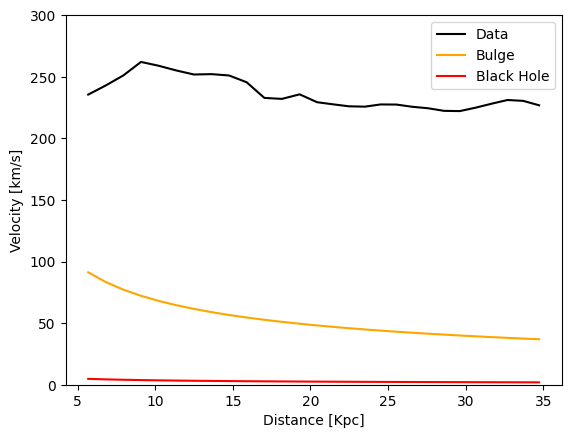

In [35]:
# plotting the final graph to include actual data and black hole data
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data") # plotting actual data
plt.plot(dis, vel_bulge.value, color="orange", label="Bulge")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
# plotting black hole data
plt.xlabel("Distance [Kpc]") # label for the x axis
plt.ylabel("Velocity [km/s]") # label for the y axis
plt.ylim(0,300) # set the y axis limits
plt.legend() # add a legend to the plot